In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
df = pd.read_csv(r"C:\Users\rocki\Documents\2 сем\ТМО\Expanded_data_with_more_features.csv")
df = df.replace(',', '.', regex=True)

In [3]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


## Удалим пропуски: 

In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

,Total,Percent
TransportMeans,3134,10.2
ParentEduc,1845,6.0
EthnicGroup,1840,6.0
TestPrep,1830,6.0
NrSiblings,1572,5.1
ParentMaritalStatus,1190,3.9
WklyStudyHours,955,3.1
IsFirstChild,904,3.0
PracticeSport,631,2.1
Unnamed: 0,0,0.0


In [6]:
df = df.dropna()

In [7]:
draw_missing(df).round(1)

,Total,Percent
Unnamed: 0,0,0.0
Gender,0,0.0
EthnicGroup,0,0.0
ParentEduc,0,0.0
LunchType,0,0.0
TestPrep,0,0.0
ParentMaritalStatus,0,0.0
PracticeSport,0,0.0
IsFirstChild,0,0.0
NrSiblings,0,0.0


## Закодируем категориальные признаки:

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df['IsFirstChild'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['IsFirstChild'] = df['IsFirstChild'].map({'yes':1, 'no':0})

In [11]:
df['ParentEduc'].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [12]:
df['ParentEduc'] = df['ParentEduc'].map({"master's degree":5, "some college":3, "associate's degree":2, "some high school":1, "high school":1, "bachelor's degree":4  })

In [13]:
df['PracticeSport'].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [14]:
df['PracticeSport'] = df['PracticeSport'].map({'sometimes':1, 'regularly':2, 'never':0})

In [15]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [16]:
df['TestPrep'] = df['TestPrep'].map({'completed':1, 'none':0})

In [17]:
le = LabelEncoder()
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        df[col] = le.fit_transform(df[col])
        print(col)

Gender
EthnicGroup
LunchType
ParentMaritalStatus
TransportMeans
WklyStudyHours


In [18]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,0,1,5,1,0,2,1,1,4.0,1,1,87,93,91
4,4,1,2,3,1,0,1,1,1,0.0,1,0,76,78,75
5,5,0,1,2,1,0,1,2,1,1.0,1,0,73,84,79
6,6,0,1,3,1,1,3,0,0,1.0,0,0,85,93,89
7,7,1,1,3,0,0,1,1,1,1.0,0,2,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,794,1,2,3,1,0,1,2,0,2.0,1,0,58,53,49
30636,816,0,3,1,1,0,2,1,0,2.0,1,0,59,61,65
30637,890,1,4,1,1,0,2,2,0,1.0,0,0,58,53,51
30639,934,0,3,2,1,1,1,2,0,3.0,1,0,82,90,93


## Разделим выборку на обучающую и тестовую

In [19]:
goal_column='Gender'

In [20]:
X = df.drop(goal_column, axis=1)
X

,Unnamed: 0,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,1,5,1,0,2,1,1,4.0,1,1,87,93,91
4,4,2,3,1,0,1,1,1,0.0,1,0,76,78,75
5,5,1,2,1,0,1,2,1,1.0,1,0,73,84,79
6,6,1,3,1,1,3,0,0,1.0,0,0,85,93,89
7,7,1,3,0,0,1,1,1,1.0,0,2,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,794,2,3,1,0,1,2,0,2.0,1,0,58,53,49
30636,816,3,1,1,0,2,1,0,2.0,1,0,59,61,65
30637,890,4,1,1,0,2,2,0,1.0,0,0,58,53,51
30639,934,3,2,1,1,1,2,0,3.0,1,0,82,90,93


In [21]:
Y = df[[goal_column]]
Y

,Gender
2,0
4,1
5,0
6,0
7,1
...,...
30635,1
30636,0
30637,1
30639,0


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (15394, 14)
X_test: (3849, 14)
Y_train: (15394, 1)
Y_test: (3849, 1)


## Построим базовые модели на основе метода ближайших соседей

In [25]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [26]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(X_train, Y_train)
target1_2 = cl1_2.predict(X_test)
len(target1_2), target1_2

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(3849, array([1, 1, 0, ..., 0, 1, 1]))

In [27]:
# 2 ближайших соседей# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(X_train, Y_train)
target1_1 = cl1_1.predict(X_test)
len(target1_1), target1_1


C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(3849, array([1, 1, 0, ..., 0, 1, 1]))

## Обучение модели с произвольным гиперпараметром

In [28]:
from typing import Dict, Tuple

In [29]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [30]:
print_class_proportions(Y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 7870 	 	 51.12%
1 	 7524 	 	 48.88%


In [31]:
print_class_proportions(Y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 1905 	 	 49.49%
1 	 1944 	 	 50.51%


## Метрика accuracy

In [32]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [33]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [34]:
accuracy_score(Y_test, target1_2)

0.8339828526890102

In [35]:
accuracy_score(Y_test, target1_1)

0.771109379059496

Можем сделать вывод, что метод 10 ближайших соседей для нашей задачи более точен

## Кросс-валидация и подбор гиперпараметра K через GridSearch и RandomizedSearch

### Кросс-валидация

In [36]:

from sklearn.model_selection import cross_val_score, cross_validate

In [37]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         df, df.Gender, cv=3)
scores

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.78300857, 0.7821952 , 0.78453383])

In [38]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        df, df.Gender, scoring='f1_weighted', 
                        cv=3, return_train_score=True)
scores

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'fit_time': array([0.09972477, 0.08983517, 0.09019136]),
 'score_time': array([0.46827412, 0.46179247, 0.46636367]),
 'test_score': array([0.77967868, 0.77860043, 0.78060372]),
 'train_score': array([0.89461246, 0.89267945, 0.88976403])}

## Стратегия K-Fold

In [39]:
from sklearn.model_selection import KFold

In [40]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         df, df.Gender, scoring='f1_weighted', 
                         cv=kf)
scores

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'fit_time': array([0.13743734, 0.12232995, 0.1229279 , 0.12852359, 0.12350488]),
 'score_time': array([0.27899265, 0.26840162, 0.25855398, 0.29239655, 0.29852033]),
 'test_score': array([0.79165773, 0.76785911, 0.77934696, 0.77310249, 0.78083837])}

## Стратегия Repeated K-Fold

In [41]:

from sklearn.model_selection import RepeatedKFold

In [42]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         df, df.Gender, scoring='f1_weighted', 
                         cv=kf)
scores

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'fit_time': array([0.09063435, 0.09499192, 0.08709931, 0.09149098, 0.08598208,
        0.08860135]),
 'score_time': array([0.44938374, 0.45871568, 0.46382356, 0.50986981, 0.44833875,
        0.53536057]),
 'test_score': array([0.78420704, 0.7739388 , 0.77524276, 0.77356384, 0.77538927,
        0.78090245])}

## Оптимизация

### Через GridSearch

In [43]:

from sklearn.model_selection import GridSearchCV

In [44]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [45]:

%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

Wall time: 19 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [46]:
clf_gs.cv_results_

{'mean_fit_time': array([0.09036326, 0.08519564, 0.08591213, 0.08971791, 0.08432961,
        0.08363523, 0.08581314, 0.08738551, 0.08793507, 0.08808722]),
 'std_fit_time': array([0.00648881, 0.00691377, 0.00431082, 0.00371461, 0.00152542,
        0.00267002, 0.00420427, 0.00779154, 0.00421158, 0.00838407]),
 'mean_score_time': array([0.25762429, 0.25787058, 0.25660205, 0.27353959, 0.28290901,
        0.28619385, 0.29137483, 0.31259351, 0.3203764 , 0.35151157]),
 'std_score_time': array([0.00891592, 0.01628068, 0.00497502, 0.01369084, 0.01259736,
        0.00799268, 0.00876655, 0.0174325 , 0.01069142, 0.0199498 ]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [47]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [48]:
clf_gs.best_score_

0.8322718552241695

In [49]:
clf_gs.best_params_

{'n_neighbors': 20}

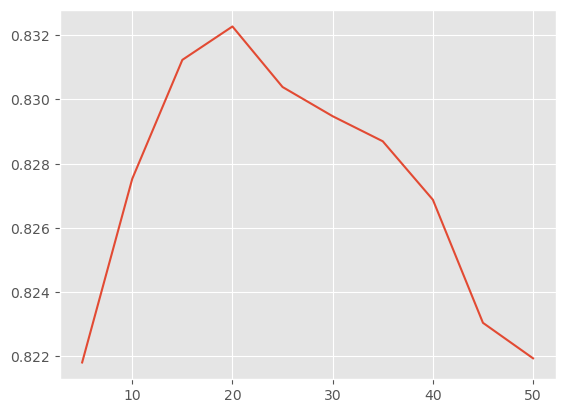

In [50]:

plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Через RandomizedSearch

In [51]:

from sklearn.model_selection import RandomizedSearchCV

In [52]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, Y_train)

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

Wall time: 19.2 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [53]:

clf_rs.best_score_, clf_rs.best_params_

(0.8322718552241695, {'n_neighbors': 20})

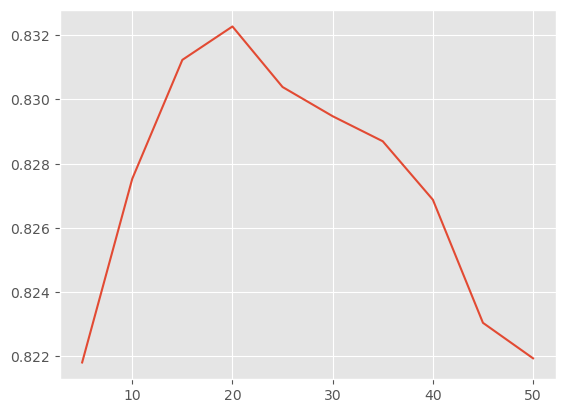

In [54]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])


## Построение оптимальной модели

Оптимальное число ближайших соседей = 20. Построим оптимальную модель:

In [55]:
clf_o = KNeighborsClassifier(n_neighbors=20)
clf_o.fit(X_train, Y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(3849, array([1, 1, 0, ..., 0, 1, 1]))

## Оптимизация гиперпараметра

## Метрика "Матрица ошибок"

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(Y_test, target1_2, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[1663,  242,    0,    0,    0,    0,    0,    0],
       [ 397, 1547,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]], dtype=int64)

Визуально представим матрицу ошибок, показывающую количество верно и ошибочно классифицированных данных:

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


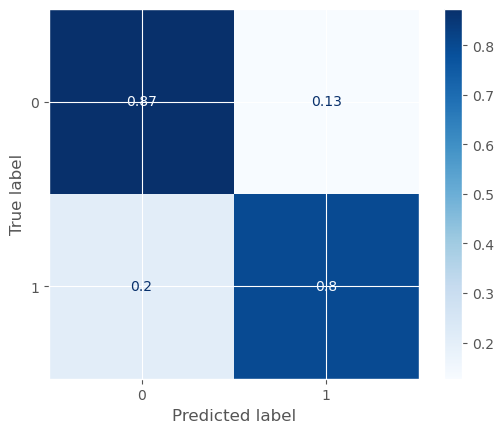

In [58]:
ConfusionMatrixDisplay.from_estimator(
        cl1_2,
        X_test,
        Y_test,
        display_labels=cl1_2.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

In [59]:

confusion_matrix(Y_test, target_o, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[1647,  258,    0,    0,    0,    0,    0,    0],
       [ 359, 1585,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]], dtype=int64)

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


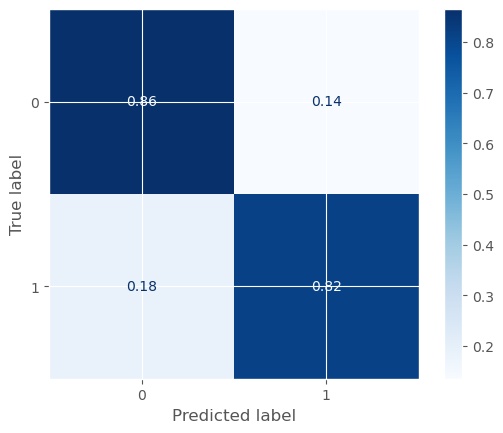

In [60]:
ConfusionMatrixDisplay.from_estimator(
        clf_o,
        X_test,
        Y_test,
        display_labels=clf_o.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )